In [156]:
##Bostoon house pric prediction by Linear Regression ML


In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.datasets import fetch_california_housing

In [160]:
df = fetch_california_housing()

In [162]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [164]:
## lets check description of dataset
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [166]:
x = pd.DataFrame(df['data'],columns = df['feature_names'])

In [168]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [170]:
y = pd.DataFrame(df['target'],columns = df['target_names'])

In [172]:
y.sample()

,MedHouseVal
18783,0.661


In [174]:
df = pd.concat([x,y],axis = 1)

In [176]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
5126,1.5109,38.0,4.895623,1.087542,1098.0,3.696970,33.99,-118.28,1.040
16395,2.8167,35.0,6.459649,1.052632,783.0,2.747368,38.00,-121.22,1.621
13201,2.9107,7.0,5.545455,1.098485,431.0,3.265152,34.06,-117.70,0.953
3894,4.3571,35.0,4.975904,1.022375,1757.0,3.024096,34.20,-118.52,1.998
4527,2.5455,47.0,3.194690,1.039823,930.0,4.115044,34.05,-118.21,1.143


In [178]:
df['price'] = pd.DataFrame(df['MedHouseVal'])

In [180]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,price
9649,2.5598,16.0,5.117808,1.042466,1942.0,2.660274,37.07,-120.83,1.202,1.202
1438,5.1021,27.0,5.779582,0.993039,1171.0,2.716937,37.97,-122.00,2.028,2.028
5990,5.8891,37.0,6.522642,1.026415,1344.0,2.535849,34.10,-117.73,2.260,2.260
12140,4.6000,7.0,5.133333,0.800000,64.0,4.266667,33.83,-117.17,1.875,1.875
3929,4.3654,31.0,5.155556,1.027778,990.0,2.750000,34.19,-118.55,2.238,2.238


In [182]:
df = df.drop('MedHouseVal' , axis = 1)

In [184]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
3608,3.0187,16.0,3.883578,1.083333,4718.0,2.890931,34.23,-118.46,1.546
18881,2.3000,52.0,3.594203,1.246377,173.0,2.507246,38.10,-122.25,1.094
19774,2.2070,21.0,5.781163,1.058172,888.0,2.459834,39.95,-122.23,0.864
5628,3.1250,46.0,3.142857,1.571429,32.0,4.571429,33.76,-118.27,1.125
2099,1.5174,43.0,4.609005,0.978673,1492.0,3.535545,36.76,-119.77,0.546


In [186]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [188]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## we will do EDA(exploratory data analysis)
## correlation

In [191]:
df.corr(numeric_only = True)['price']

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
price         1.000000
Name: price, dtype: float64

##after analyze make plt plot for output and specific column input 

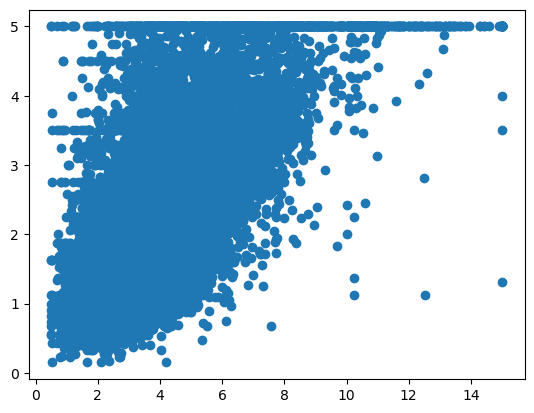

In [194]:
plt.scatter(x = df['MedInc'], y = df['price'])

## make linearregressio line by seaborn

<Axes: xlabel='MedInc', ylabel='price'>

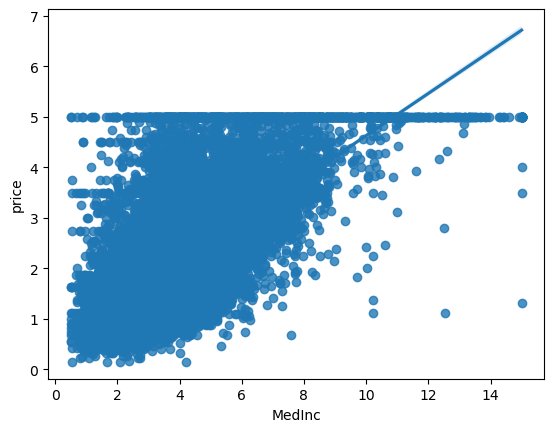

In [197]:
sbn.regplot(x=df['MedInc'] , y=df['price'])

<Axes: xlabel='AveRooms', ylabel='price'>

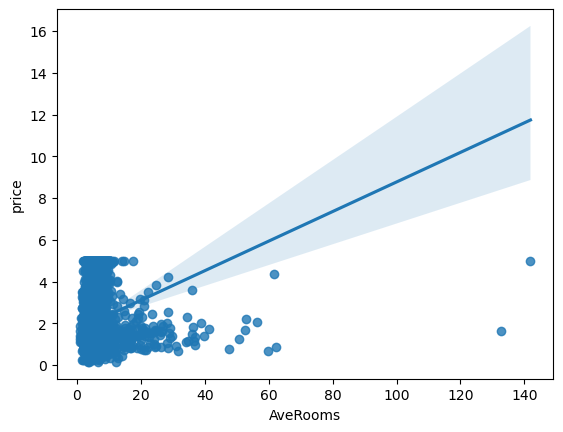

In [198]:
sbn.regplot(x = df['AveRooms'] , y = df['price'])

## divide into independent and dependent feature

In [200]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [201]:
x.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
13545,2.2865,38.0,4.784387,1.055762,1047.0,3.892193,34.13,-117.31


In [203]:
y.sample()

13847    0.983
Name: price, dtype: float64

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

## satndardizing the datascale

In [213]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [215]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## model_training

In [218]:
from sklearn.linear_model import LinearRegression

In [220]:
lin_reg = LinearRegression()

In [222]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [224]:
## print the coefficiend and intercept
print(lin_reg.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [226]:
##print intercept
print(lin_reg.intercept_)

2.0692396089424165


In [228]:
##on which parameters model has been trained
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

##prediction with test data

In [231]:
reg_pred = lin_reg.predict(x_test)

In [233]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

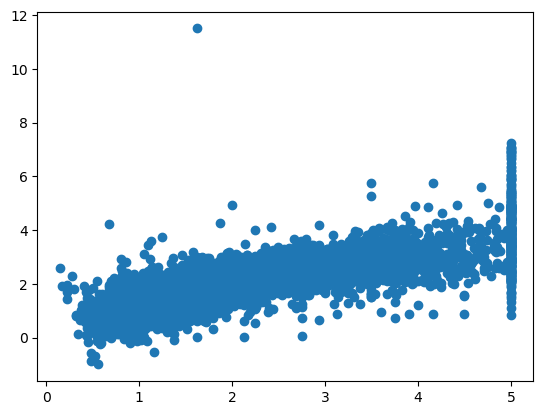

In [235]:
plt.scatter(y_test,reg_pred)

In [237]:
residual = y_test - reg_pred

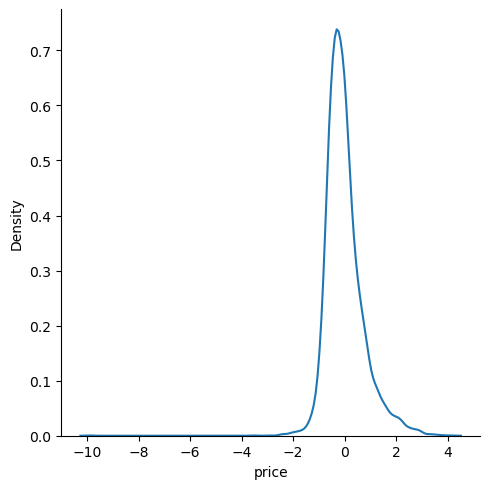

In [239]:
sbn.displot(residual , kind = 'kde')

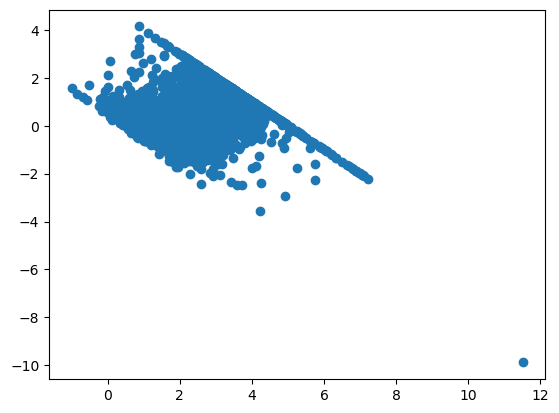

In [241]:
## scatter plot with respect to prediction and residual
##uniform distribution
plt.scatter(reg_pred,residual)

##for sure use performance matrix like MSE Rsquare RMSE etc.

In [244]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5305677824766755
0.5272474538305956
0.7284008391515454


#R square and adjusted R square

In [247]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
score

0.5957702326061662

##Adusted R^2 

Adusted R^2 = 1-[(1-R^2)*(n-1)/(n-k-1)]
R2: The R2 model : n=The number of observation k: the number of predictor variable

In [250]:
adjusted_R2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [252]:
adjusted_R2

0.5952472117200025

##new data prediction

In [255]:
data = fetch_california_housing()
data.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [257]:
scaler.transform(data.data[0].reshape(1,-1))

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [271]:
lin_reg.predict(scaler.transform(data.data[0].reshape(1,-1)))

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])

In [273]:
import pickle

In [275]:
pickle.dump(lin_reg,open('regmodel.pkl','wb'))

In [277]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [279]:
pickled_model.predict(scaler.transform(data.data[0].reshape(1,-1)))

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])